In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [23]:
df=pd.read_csv("Real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [24]:
df=df.drop("No",axis=1)

In [25]:
df.columns=["transaction date","house age","distance from MRT","number of conv stores","lat","long","prices per unit"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction date       414 non-null    float64
 1   house age              414 non-null    float64
 2   distance from MRT      414 non-null    float64
 3   number of conv stores  414 non-null    int64  
 4   lat                    414 non-null    float64
 5   long                   414 non-null    float64
 6   prices per unit        414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [26]:
df["transaction date"]=[int(str(x)[:4]) for x in df["transaction date"]]

In [8]:
df.describe()

,transaction date,house age,distance from MRT,number of conv stores,lat,long,prices per unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2012.695652,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.460687,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<AxesSubplot:xlabel='distance from MRT', ylabel='Count'>

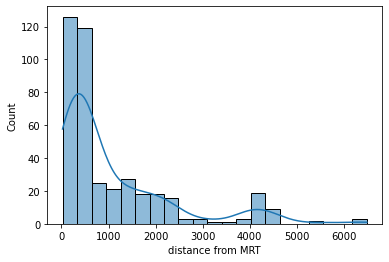

In [15]:
sns.histplot(df["distance from MRT"],kde=True)

In [27]:
df=df[df["distance from MRT"]<5000]

<AxesSubplot:xlabel='prices per unit', ylabel='Count'>

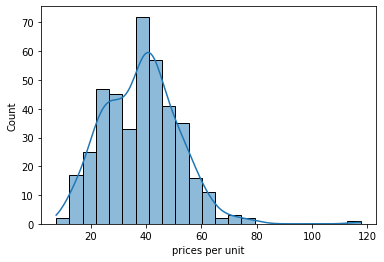

In [12]:
sns.histplot(df["prices per unit"],kde=True)

In [28]:
df=df[df["prices per unit"]<100]

<AxesSubplot:>

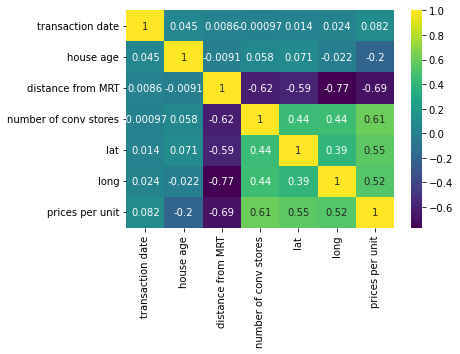

In [18]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [29]:
x=df.drop("prices per unit",axis=1)
y=df["prices per unit"]

In [30]:
mms=MinMaxScaler()

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25)

In [32]:
xtrain=pd.DataFrame(mms.fit_transform(xtrain),columns=x.columns)
xtest=pd.DataFrame(mms.transform(xtest),columns=x.columns)

In [56]:
results=[]

In [33]:
def Plotter(prediction, ytest):
    sns.lineplot(x=range(0,70),y=range(0,70), color="r")
    sns.scatterplot(x=prediction,y=ytest)
    plt.xlabel("prediction")

In [55]:
def Constructor(model, xtrain, ytrain, xtest, ytest):
    print(model)
    prediction=model.fit(xtrain,ytrain).predict(xtest)
    print("mean absolute error: "+ str(mean_absolute_error(prediction,ytest)))
    
    Plotter(prediction, ytest)
    return mean_absolute_error(prediction,ytest)
    

KNeighborsRegressor()
mean absolute error: 5.5001960784313715


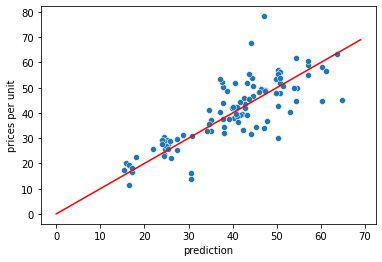

In [58]:
results.append(Constructor(KNeighborsRegressor(),xtrain, ytrain, xtest, ytest))

LinearRegression()
mean absolute error: 5.871938331202522


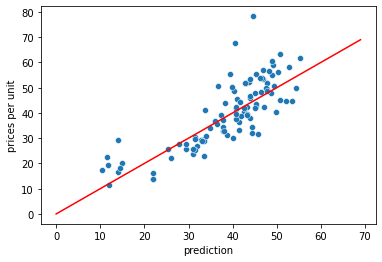

In [59]:
results.append(Constructor(LinearRegression(),xtrain, ytrain, xtest, ytest))

DecisionTreeRegressor()
mean absolute error: 6.277941176470588


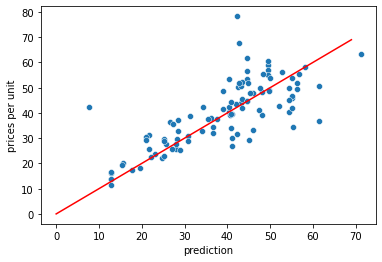

In [60]:
results.append(Constructor(DecisionTreeRegressor(),xtrain, ytrain, xtest, ytest))

RandomForestRegressor()
mean absolute error: 5.075446638655465


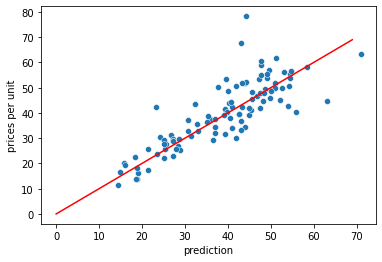

In [61]:
results.append(Constructor(RandomForestRegressor(),xtrain, ytrain, xtest, ytest))

SVR()
mean absolute error: 6.231122485611848


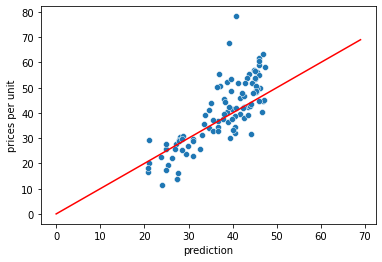

In [62]:
results.append(Constructor(SVR(),xtrain, ytrain, xtest, ytest))

In [40]:
pca=PCA(.95)

In [41]:
xtrain=pd.DataFrame(pca.fit_transform(xtrain))
xtest=pd.DataFrame(pca.transform(xtest))

KNeighborsRegressor()
mean absolute error: 5.5001960784313715


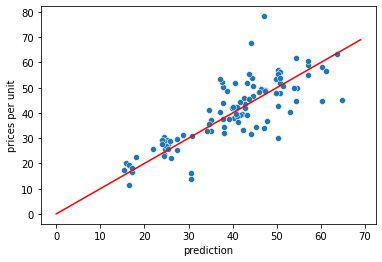

In [63]:
results.append(Constructor(KNeighborsRegressor(),xtrain, ytrain, xtest, ytest))

LinearRegression()
mean absolute error: 5.871938331202522


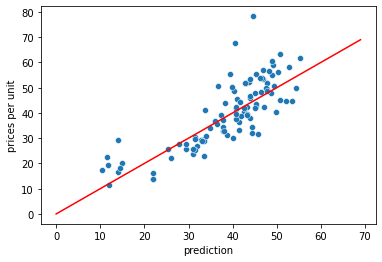

In [64]:
results.append(Constructor(LinearRegression(),xtrain, ytrain, xtest, ytest))

DecisionTreeRegressor()
mean absolute error: 6.024509803921568


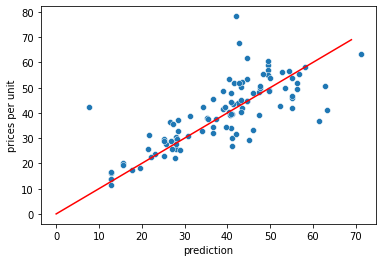

In [65]:
results.append(Constructor(DecisionTreeRegressor(),xtrain, ytrain, xtest, ytest))

RandomForestRegressor()
mean absolute error: 5.16147923669468


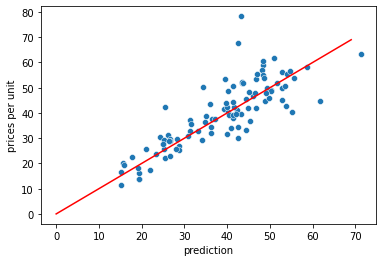

In [66]:
results.append(Constructor(RandomForestRegressor(),xtrain, ytrain, xtest, ytest))

SVR()
mean absolute error: 6.231122485611848


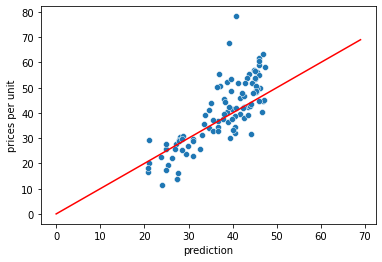

In [67]:
results.append(Constructor(SVR(),xtrain, ytrain, xtest, ytest))

In [49]:
xtrain=pd.DataFrame(mms.fit_transform(xtrain))
xtest=pd.DataFrame(mms.transform(xtest))

xtrain=pd.DataFrame(pca.fit_transform(xtrain))
xtest=pd.DataFrame(pca.transform(xtest))

KNeighborsRegressor()
mean absolute error: 5.5001960784313715


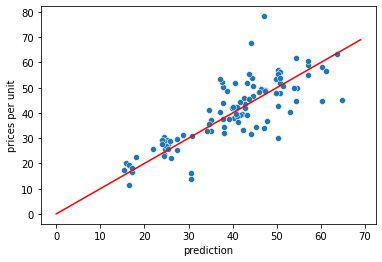

In [68]:
results.append(Constructor(KNeighborsRegressor(),xtrain, ytrain, xtest, ytest))

LinearRegression()
mean absolute error: 5.871938331202522


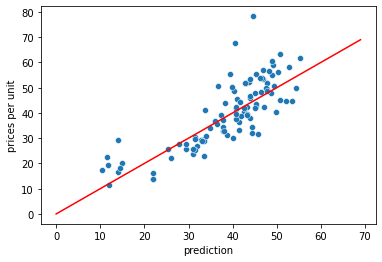

In [69]:
results.append(Constructor(LinearRegression(),xtrain, ytrain, xtest, ytest))

DecisionTreeRegressor()
mean absolute error: 6.288725490196079


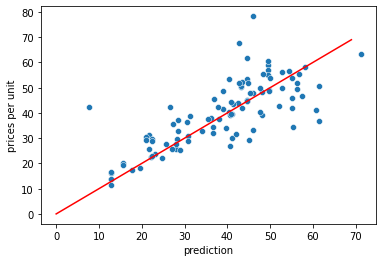

In [70]:
results.append(Constructor(DecisionTreeRegressor(),xtrain, ytrain, xtest, ytest))

RandomForestRegressor()
mean absolute error: 4.993589682539683


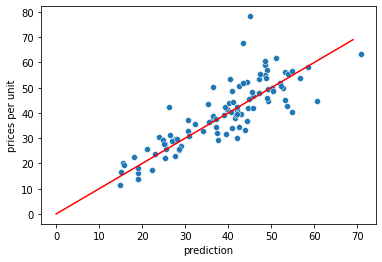

In [71]:
results.append(Constructor(RandomForestRegressor(),xtrain, ytrain, xtest, ytest))

SVR()
mean absolute error: 6.231122485611848


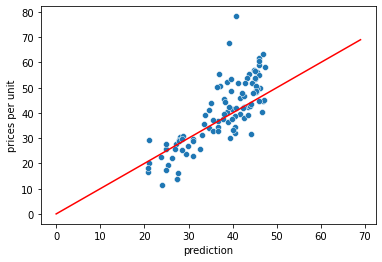

In [72]:
results.append(Constructor(SVR(),xtrain, ytrain, xtest, ytest))

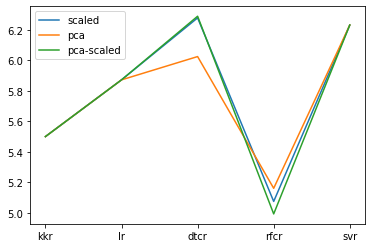

In [85]:
temp=[]
counter=0
for i in results:
    temp.append(i)
    
    if len(temp)==5:
        counter += 1
        sns.lineplot(x=["kkr","lr","dtcr","rfcr","svr"],y=temp)
        temp=[]
        
plt.legend(["scaled","pca","pca-scaled"])